In [1]:
import keras
from keras.models import Sequential
from keras.layers import RNN
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dense, TimeDistributed
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras import regularizers

%matplotlib inline

Using TensorFlow backend.


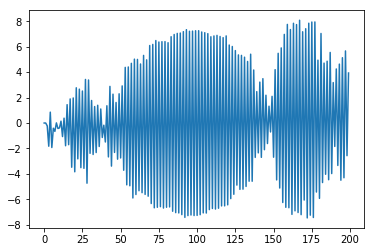

In [2]:
n=200
x1=np.linspace(-1,1,n)
x2=np.random.randn(n)
y=np.zeros(len(x1))
for i in xrange(2,len(y)):
    y[i]=x1[i]*x2[i]+x1[i-1]-y[i-1]

plt.plot(y)

In [3]:
def createSamples(x1,x2,y,hist=50):
    
    dataX=np.empty((0,hist,3),float)
    dataY=np.empty((0,1),float)
    
    for i in xrange(1,len(y)-hist+1):
        sampleX=np.concatenate((x1[i:(i+hist)].reshape(-1,1),x2[i:(i+hist)].reshape(-1,1),y[i-1:(i+hist-1)].reshape(-1,1)),axis=1)        
        sampleX=sampleX.reshape(1,hist,3)
        dataX=np.append(dataX,sampleX,axis=0)        
        dataY=np.append(dataY,y[i])
        
    
    return (dataX, dataY)        
dataX,dataY=createSamples(x1,x2,y)

In [4]:
print("dataX shape: %s"%str(dataX.shape))
print("dataY shape: %s"%str(dataY.shape))


dataX shape: (150, 50, 3)
dataY shape: (150,)


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(dataX, dataY, test_size=0.3)
print("Train X shape: %s"%str(x_train.shape))
print("Train Y shape: %s"%str(y_train.shape))

print("Test X shape: %s"%str(x_test.shape))
print("Test Y shape: %s"%str(y_test.shape))

Train X shape: (105, 50, 3)
Train Y shape: (105,)
Test X shape: (45, 50, 3)
Test Y shape: (45,)


In [23]:
keras.backend.clear_session()
drop = 0
model=Sequential()
#model.add(SimpleRNN(input_shape=(1,1),units=1, activation='tanh', return_sequences=False))
model.add(LSTM(50, input_shape=(x_train.shape[1],x_train.shape[2]) , dropout=drop, recurrent_dropout=drop,return_sequences=True,
              kernel_regularizer=keras.regularizers.l1(0),activation='sigmoid'))
model.add(LSTM(20, dropout=drop, recurrent_dropout=drop,return_sequences=True))    
model.add(LSTM(10, dropout=drop, recurrent_dropout=drop,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
print(model.summary())

#SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 20)            5680      
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                1240      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 17,731
Trainable params: 17,731
Non-trainable params: 0
_________________________________________________________________
None


Train on 105 samples, validate on 45 samples
Epoch 1/100
105/105 [==============================] - 3s 27ms/step - loss: 23.1835 - val_loss: 27.8756
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 23.0335 - val_loss: 28.0389
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 23.0492 - val_loss: 28.1880
Epoch 4/100
105/105 [==============================] - 0s 3ms/step - loss: 22.9747 - val_loss: 28.2393
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: 22.9762 - val_loss: 28.3183
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: 22.9540 - val_loss: 28.3617
Epoch 7/100
105/105 [==============================] - 0s 2ms/step - loss: 22.9503 - val_loss: 28.4239
Epoch 8/100
105/105 [==============================] - 0s 2ms/step - loss: 22.9403 - val_loss: 28.4748
Epoch 9/100
105/105 [==============================] - 0s 3ms/step - loss: 22.9409 - val_loss: 28.5280
Epoch 10/100
105/105 [=====

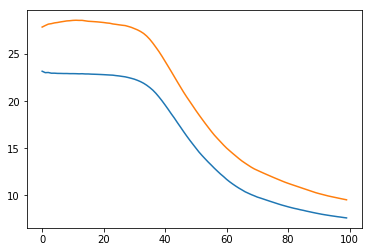

In [24]:
batch_size=60
tensorboard = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1, batch_size=batch_size, write_graph=True, write_grads=True)
history=model.fit(x_train,y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=100, verbose=1, callbacks=[tensorboard])


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [9]:
history.history['loss'][-10:]

[2.224900722503662,
 2.9873827525547574,
 2.2945124421800887,
 2.223390647343227,
 2.2579475130353654,
 2.4001621178218295,
 2.026092563356672,
 2.1479244913373674,
 2.198772873197283,
 1.9562500034059798]

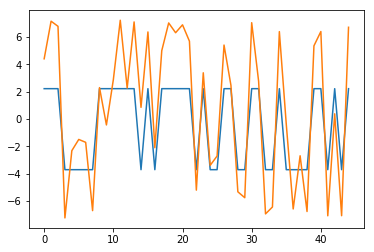

In [9]:
plt.plot(model.predict(x_test))
plt.plot(y_test)

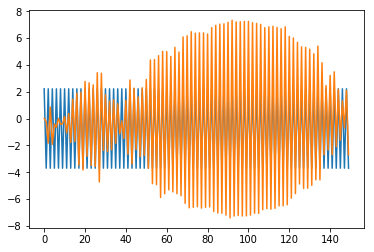

In [8]:
plt.plot(model.predict(dataX))
plt.plot(dataY)

In [206]:
N_train = 10
from numpy.random import choice
one_indexes = choice(a=N_train, size=N_train / 2, replace=False)
one_indexes

array([6, 3, 5, 2, 1])

In [8]:
dataX.shape

(148, 50, 3)

In [37]:
def createSingleBatch(x1,x2,y):
    sampleX=np.concatenate((x1[1:].reshape(-1,1),x2[1:].reshape(-1,1),y[0:-1].reshape(-1,1)),axis=1)        
    print sampleX.shape 
    dataX=sampleX.reshape(len(y)-1,1,3)
    dataY=y[1:]
        
    
    return (dataX, dataY)        
dataX,dataY=createSingleBatch(x1,x2,y)


(199, 3)


In [38]:
print("dataX shape: %s"%str(dataX.shape))
print("dataY shape: %s"%str(dataY.shape))


dataX shape: (199, 1, 3)
dataY shape: (199,)


In [43]:
drop = 0.1
model=Sequential()

model.add(LSTM(100, batch_input_shape=(1,1,3) , dropout=drop, recurrent_dropout=drop,return_sequences=True,stateful=True))
#model.add(LSTM(50, dropout=drop, recurrent_dropout=drop,return_sequences=True,stateful=True))    
model.add(LSTM(15, dropout=drop, recurrent_dropout=drop,return_sequences=False,stateful=True))    
model.add(Dense(10))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (1, 1, 100)               41600     
_________________________________________________________________
lstm_29 (LSTM)               (1, 15)                   6960      
_________________________________________________________________
dense_19 (Dense)             (1, 10)                   160       
_________________________________________________________________
dense_20 (Dense)             (1, 1)                    11        
Total params: 48,731
Trainable params: 48,731
Non-trainable params: 0
_________________________________________________________________


In [44]:
mean_tr_loss=[]
for epoch in range(50):    
    hist_tr_loss = []
    for i in xrange(len(dataY)):        
        tr_loss = model.train_on_batch(x=dataX[i].reshape(1,1,3),y=dataY[i].reshape(1,1))        
        hist_tr_loss.append(tr_loss)
    model.reset_states()
    mean_tr_loss.append(np.mean(hist_tr_loss))
    print('loss training = {}'.format(np.mean(hist_tr_loss)))

loss training = 7.15360593796
loss training = 5.04400444031
loss training = 1.77768063545
loss training = 1.4669355154
loss training = 1.41169130802
loss training = 1.32046496868
loss training = 1.09502565861
loss training = 1.32703995705
loss training = 1.11369287968
loss training = 0.9699010849
loss training = 1.24541091919
loss training = 1.31365144253
loss training = 1.2544311285
loss training = 1.16307318211
loss training = 0.945309102535
loss training = 0.948464274406
loss training = 0.879662036896
loss training = 1.56397247314
loss training = 0.97485691309
loss training = 1.07395267487
loss training = 0.934133470058
loss training = 0.836001932621
loss training = 0.751337766647
loss training = 0.83223259449
loss training = 0.848427653313
loss training = 0.699298620224
loss training = 0.669418513775
loss training = 0.581333994865
loss training = 0.646811306477
loss training = 0.610070407391
loss training = 0.797533035278
loss training = 0.632897138596
loss training = 0.57878220081

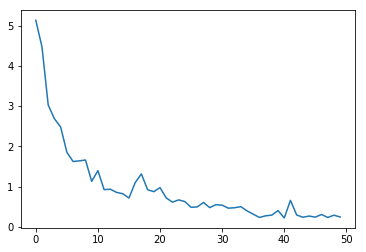

In [42]:
plt.plot(mean_tr_loss)

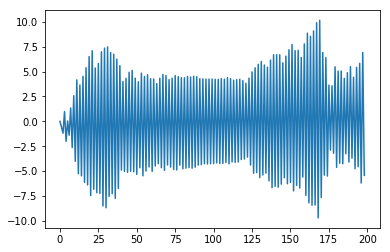

In [131]:
#plt.plot(model.predict(dataX))
plt.plot(dataY)

In [139]:
estimatedY=[]
for i in xrange(len(dataY)):
    yest=model.predict(dataX[i].reshape(1,1,3))
    estimatedY.append(yest.squeeze())


array(-5.9378185, dtype=float32)

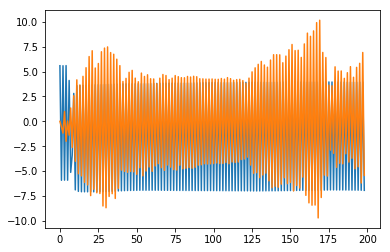

In [141]:
plt.plot(estimatedY)
plt.plot(dataY)

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10
batch_size = 32

# Expected input batch shape: (batch_size, timesteps, data_dim)
# Note that we have to provide the full batch_input_shape since the network is stateful.
# the sample of index i in batch k is the follow-up for the sample i in batch k-1.
model = Sequential()
model.add(LSTM(32, return_sequences=True, stateful=True,
               batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True, stateful=True))
model.add(LSTM(32, stateful=True))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((batch_size * 10, timesteps, data_dim))
y_train = np.random.random((batch_size * 10, num_classes))

# Generate dummy validation data
x_val = np.random.random((batch_size * 3, timesteps, data_dim))
y_val = np.random.random((batch_size * 3, num_classes))

model.fit(x_train, y_train,
          batch_size=batch_size, epochs=5, shuffle=False,
          validation_data=(x_val, y_val))

Train on 320 samples, validate on 96 samples
Epoch 1/5
320/320 [==============================] - 2s 6ms/step - loss: 11.3772 - acc: 0.0969 - val_loss: 11.1523 - val_acc: 0.0938
Epoch 2/5
320/320 [==============================] - 0s 535us/step - loss: 11.3727 - acc: 0.0875 - val_loss: 11.1528 - val_acc: 0.1042
Epoch 3/5
320/320 [==============================] - 0s 623us/step - loss: 11.3718 - acc: 0.0813 - val_loss: 11.1530 - val_acc: 0.1042
Epoch 4/5
320/320 [==============================] - 0s 652us/step - loss: 11.3712 - acc: 0.0813 - val_loss: 11.1532 - val_acc: 0.0938
Epoch 5/5
320/320 [==============================] - 0s 639us/step - loss: 11.3707 - acc: 0.0813 - val_loss: 11.1534 - val_acc: 0.0938


In [31]:
x_train.shape

(320, 8, 16)

In [36]:
y_train.shape

(320, 10)

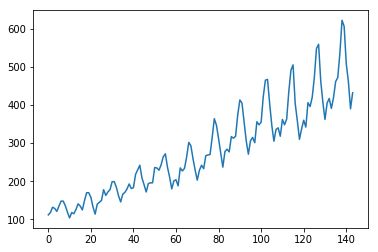

In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [176]:
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [177]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [178]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [72]:
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(trainX.shape)
print(testY.shape)

(85, 10, 1)
(37,)


In [76]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1), batch_size=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0 )

In [77]:
# make predictions
trainPredict = model.predict(trainX[1,:].reshape(1,1,1))
testPredict = model.predict(testX[1])
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

ValueError: cannot reshape array of size 10 into shape (1,1,1)

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()